# KERNEL CLEAN

In [1]:
%reset -f -s

import gc

# LIBRARIES IMPORT

In [2]:
# imports

import CNN_lib
import CNN_utilities
import fig_lib 

import numpy as np
import matplotlib.pyplot as plt
import pickle

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
d_type='processed'     # 'processed', 'synthetic'
video_d=True            # Video = True , Image = False 
test_data,number_data_points= False,500

t_btw_frm=0.05

checking_on=True

data_augmentation= True

checkpoint_path = "C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\embo_CNN_lab\_static/model_checkpoint.h5"

if d_type=='processed' : pkl_train_p='C:\PROJECTS\emboendo\CNN/pikles/processed_train_d.pkl'  
elif d_type=='synthetic' : pkl_train_p='C:\PROJECTS\emboendo\CNN/pikles/synthetic_train_d.pkl'   
     

# CNN

### GENERATE TRAIN DATA

In [4]:
# X_train,Y_train

with open(pkl_train_p, 'rb') as pikle_file:

    save_trains= pickle.load(pikle_file)

x_train,y_train,rcs =  save_trains[0],save_trains[1],save_trains[2]

max_frm_n, HEIGHT, WIDTH=np.shape(x_train)[1],np.shape(x_train)[2],np.shape(x_train)[3]


### CHECK 1

In [5]:
if checking_on:

    for x,y,r in zip(x_train,y_train,rcs):
        print(r,int(y),np.shape(x),type(x))

I1 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I11 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I2 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I9 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I28 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I33 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I38 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I39 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I40 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I42 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I44 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I45 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I47 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I49 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I51 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I53 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I54 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I56 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I57 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I58 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I61 0 (40, 160, 160, 1) <class 'numpy.ndarr

In [6]:
if checking_on:

    rec_elm='I70'
    idx=rcs.index(rec_elm)
    print(y_train[idx])

1


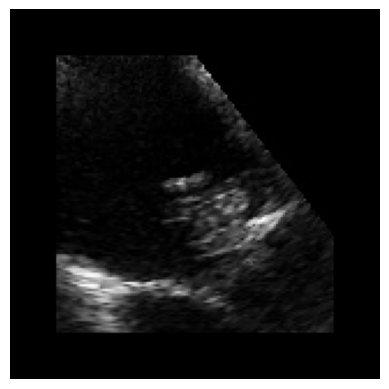

In [7]:
if checking_on:fig_lib.vid_show(x_train[idx],t_btw_frm=t_btw_frm)

In [8]:
if test_data:

    total_data_points=len(y_train)
    test_len=total_data_points-number_data_points
    
    Xx_train=x_train[0:number_data_points]
    Yy_train=y_train[0:number_data_points]
    rcs=rcs[0:number_data_points]

else:

    Xx_train=x_train
    Yy_train=y_train


## DATA SHUFFLE 1

In [9]:

Xx_train,Yy_train,recs=CNN_lib.shuffle(Xx_train,Yy_train,rcs)


### CHECK 2

In [10]:
if checking_on:

    for x,y,r in zip(Xx_train,Yy_train,recs):
        print(r,int(y),np.shape(x),type(x))

656960_6 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I314 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1120 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I758 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1110 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
109897_9 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
670615_8 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I292 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
380772_4 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
178572_12 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I507 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
512291_2 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I216 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
660022_7 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I606 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I339 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
539258_2 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I596 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I204 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
109897_4 0 (40, 160, 160, 1) <clas

In [11]:
if checking_on:

    rec_elm='I54'
    idx=recs.index(rec_elm)
    print(idx,Yy_train[idx])

159 0


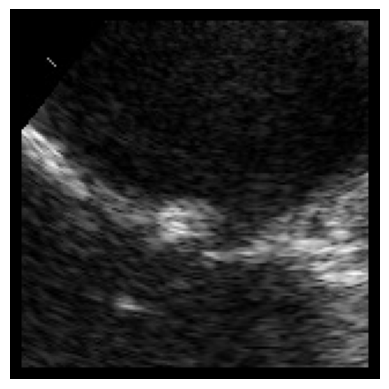

In [12]:
if checking_on:fig_lib.vid_show(Xx_train[idx],t_btw_frm=t_btw_frm)

### DATA SPLIT

In [13]:
test_size=0.2

X_train_spl, X_eval_spl, Y_train_spl, Y_eval_spl = train_test_split(Xx_train, Yy_train, test_size=test_size, shuffle=False) #,random_state=42)

recs_train =recs[0:len(Y_train_spl)]
recs_eval =recs[len(Y_train_spl)::]


print('Train data:',len(Y_train_spl),'Evaluation data:',len(Y_eval_spl))
print(len(recs_train),len(recs_eval))
print(recs_train)
print(recs_eval)
if test_data:print('Test_len:',test_len)

Train data: 528 Evaluation data: 132
528 132
['656960_6', 'I314', 'I1120', 'I758', 'I1110', '109897_9', '670615_8', 'I292', '380772_4', '178572_12', 'I507', '512291_2', 'I216', '660022_7', 'I606', 'I339', '539258_2', 'I596', 'I204', '109897_4', '224436_7', 'I359', 'I724', 'I177', 'I550', 'I992', '380772_2', 'I765', 'I90', '6272_5', '385597_15', 'I1078', '669183_2', 'I958', '6272_19', 'I117', 'I1149', 'I361', 'I394', 'I630', 'I187', 'I781', 'I588', '673676_8', '380772_7', 'I1041', '547169_6', 'I1248', '547169_1', '178572_8', '656335_1', 'I435', 'I1272', 'I1100', 'I877', 'I986', '6272_18', '224436_5', 'I632', 'I646', '178572_10', 'I693', 'I101', '670615_16', 'I730', 'I899', 'I169', 'I936', 'I773', '669183_1', 'I868', 'I57', 'I894', '656335_6', 'I893', 'I1025', 'I1226', '6272_6', 'I1217', 'I713', 'I496', '663849_14', 'I341', 'I839', '272340_2', 'I1155', 'I267', '673676_6', 'I940', '178572_4', '669183_6', 'I674', 'I1264', 'I1024', 'I870', 'I1096', 'I572', '272340_1', '673676_3', 'I209', 'I

In [14]:
if checking_on:

    rec_elm='I54'
    idx=recs_train.index(rec_elm)
    print(idx,Y_train_spl[idx])


159 0


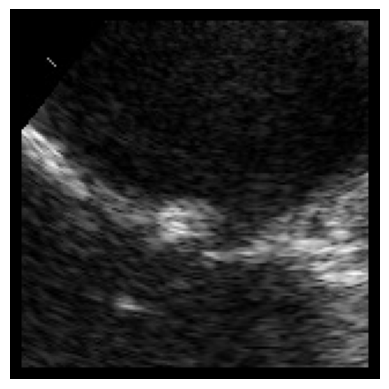

In [15]:

if checking_on:fig_lib.vid_show(X_train_spl[idx],t_btw_frm=t_btw_frm)

 Train data shape: (528, 40, 160, 160, 1)  Validation data shape: (132, 40, 160, 160, 1)


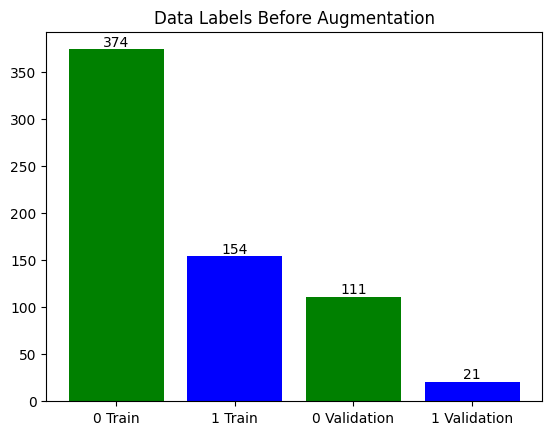

In [16]:
# check data

zeros_count = np.sum(Y_train_spl == 0)
ones_count = np.sum(Y_train_spl == 1)
zeros_count_val = np.sum(Y_eval_spl == 0)
ones_count_val = np.sum(Y_eval_spl == 1)

labels = ['0 Train', '1 Train','0 Validation', '1 Validation']
print(' Train data shape:', np.shape(X_train_spl),' Validation data shape:', np.shape(X_eval_spl))

plt.bar(labels, [zeros_count, ones_count,zeros_count_val,ones_count_val], color=['green', 'blue','green', 'blue'])

for i, count in enumerate([zeros_count, ones_count,zeros_count_val,ones_count_val]):

    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Data Labels Before Augmentation')
plt.show()

# DATA AUGMENTATION

In [17]:
if data_augmentation:
    
    number_flip_aug_1=130
    number_flip_aug_0=20

    number_


In [18]:
#video = tf.image.random_brightness(video, max_delta=0.9)    # OK
#video = tf.image.random_contrast(video, lower=0.5, upper=10)   # OK

if data_augmentation:

    aug_X_train_1,aug_Y_train_1,aug_train_recs_1=CNN_lib.main_aug_f(number_train_aug_1,X_train_spl,Y_train_spl,recs,label=1)
    aug_X_train_0,aug_Y_train_0,aug_train_recs_0=CNN_lib.main_aug_f(number_train_aug_0,X_train_spl,Y_train_spl,recs,label=0)


In [19]:
if data_augmentation:

    X_train_spl = np.concatenate((X_train_spl, aug_X_train_1,aug_X_train_0), axis=0)
    Y_train_spl = np.concatenate((Y_train_spl, aug_Y_train_1, aug_Y_train_0))
    
    
    recs_train = recs_train+aug_train_recs_1+aug_train_recs_0

    print(X_train_spl.shape,Y_train_spl.shape)
    print(X_eval_spl.shape,Y_eval_spl.shape)


(678, 40, 160, 160, 1) (678,)
(132, 40, 160, 160, 1) (132,)


### DATA SHUFFLE 2

In [20]:
if data_augmentation: X_train,Y_train,recs_train=CNN_lib.shuffle(X_train_spl,Y_train_spl,recs_train)
else: X_train,Y_train,recs_train = X_train_spl,Y_train_spl,recs_train

X_eval=X_eval_spl
Y_eval=Y_eval_spl

 Train data shape: (678, 40, 160, 160, 1)  Validation data shape: (132, 40, 160, 160, 1)


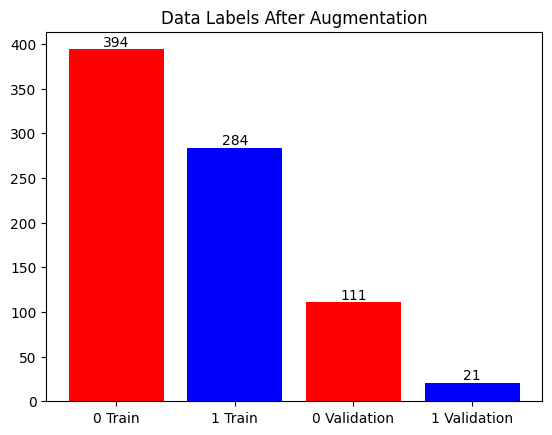

In [21]:
# check data
if data_augmentation:

    zeros_count = np.sum(Y_train == 0)
    ones_count = np.sum(Y_train == 1)
    zeros_count_val = np.sum(Y_eval == 0)
    ones_count_val = np.sum(Y_eval == 1)

    labels = ['0 Train', '1 Train','0 Validation', '1 Validation']
    print(' Train data shape:', np.shape(X_train),' Validation data shape:', np.shape(X_eval))

    plt.bar(labels, [zeros_count, ones_count,zeros_count_val,ones_count_val], color=['red', 'blue','red', 'blue'])

    for i, count in enumerate([zeros_count, ones_count,zeros_count_val,ones_count_val]):

        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

    plt.title('Data Labels After Augmentation')
    plt.show()

### CHECK 3

In [22]:
if checking_on:

    for x,y,r in zip(X_train,Y_train,recs_train):
        print(r,int(y),np.shape(x),type(x))
        

656960_7 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I548 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I94 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I90 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I1003 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I559 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I463 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I146 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I191 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I697 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
AUG_I91 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
AUG_656335_7 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I187 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
AUG_I191 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I325 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
AUG_I855 1 (40, 160, 160, 1) <class 'numpy.ndarray'>
I718 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I709 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I870 0 (40, 160, 160, 1) <class 'numpy.ndarray'>
I624 0 (40, 160, 160, 1) <class 'numpy.ndarray'

#  CNN

In [23]:
print('LIBRARY MODELS:')
print(' ')

for model_name in CNN_lib.MODELS.values(): print(model_name)

LIBRARY MODELS:
 
image_full
image_conv
image_conv_augmentation
video_conv2D
video_conv3D


In [24]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'video_conv3D'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epch=11


### MODEL

In [25]:
gc.collect()

54196

In [26]:
# MODEL 

if model_from_CNN_lib:
  
  if video_d: model = CNN_lib.lib_models(mdl,im_input_shp=(max_frm_n, HEIGHT, WIDTH, 1))
  else: model = CNN_lib.lib_models(mdl,im_input_shp=(HEIGHT, WIDTH,1))

else:

  model = models.Sequential([
          layers.Conv3D(filters=16, kernel_size=(3, 3, 3), activation='relu',input_shape=(max_frm_n, HEIGHT, WIDTH, 1)),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(3, 3, 3),  activation='relu'),
          layers.Dropout(0.2),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=32, kernel_size=(3, 3, 3),  activation='relu'),
          layers.MaxPooling3D(pool_size=(2, 2, 2)),
          layers.Conv3D(filters=16, kernel_size=(3, 3, 3),  activation='relu'),
          layers.Flatten(),
          layers.Dropout(0.2),
          layers.Dense(64, activation='relu'),
          layers.Dense(64, activation='relu'),
          layers.Dense(1,activation='sigmoid')
          ])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 38, 158, 158, 16   448       
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 19, 79, 79, 16)    0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 17, 77, 77, 32)    13856     
                                                                 
 dropout (Dropout)           (None, 17, 77, 77, 32)    0         
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 8, 38, 38, 32)     0         
 g3D)                                                            
                                                       

In [27]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

In [28]:
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss',   mode='min', verbose=1)            


### TRAINNING

In [29]:
history =model.fit(X_train, Y_train, epochs=epch, validation_data=(X_eval,Y_eval),callbacks=[checkpoint])

Epoch 1/11


22/22 [==============================] - ETA: 0s - loss: 0.6898 - accuracy: 0.5693
Epoch 1: val_loss improved from inf to 0.67721, saving model to C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\embo_CNN_lab\_static\model_checkpoint.h5
22/22 [==============================] - 51s 2s/step - loss: 0.6898 - accuracy: 0.5693 - val_loss: 0.6772 - val_accuracy: 0.8409
Epoch 2/11


c:\PROJECTS\emboendo\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - ETA: 0s - loss: 0.6868 - accuracy: 0.5811
Epoch 2: val_loss improved from 0.67721 to 0.65152, saving model to C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\embo_CNN_lab\_static\model_checkpoint.h5
22/22 [==============================] - 50s 2s/step - loss: 0.6868 - accuracy: 0.5811 - val_loss: 0.6515 - val_accuracy: 0.8409
Epoch 3/11
22/22 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5811
Epoch 3: val_loss improved from 0.65152 to 0.64287, saving model to C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\embo_CNN_lab\_static\model_checkpoint.h5
22/22 [==============================] - 50s 2s/step - loss: 0.6871 - accuracy: 0.5811 - val_loss: 0.6429 - val_accuracy: 0.8409
Epoch 4/11
22/22 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.6003
Epoch 4: val_loss improved from 0.64287 to 0.58218, saving model to C:/PROJECTS\emboendo\CNN\python-machine-learning\emboendo_ML\em

### EVALUATE MODEL

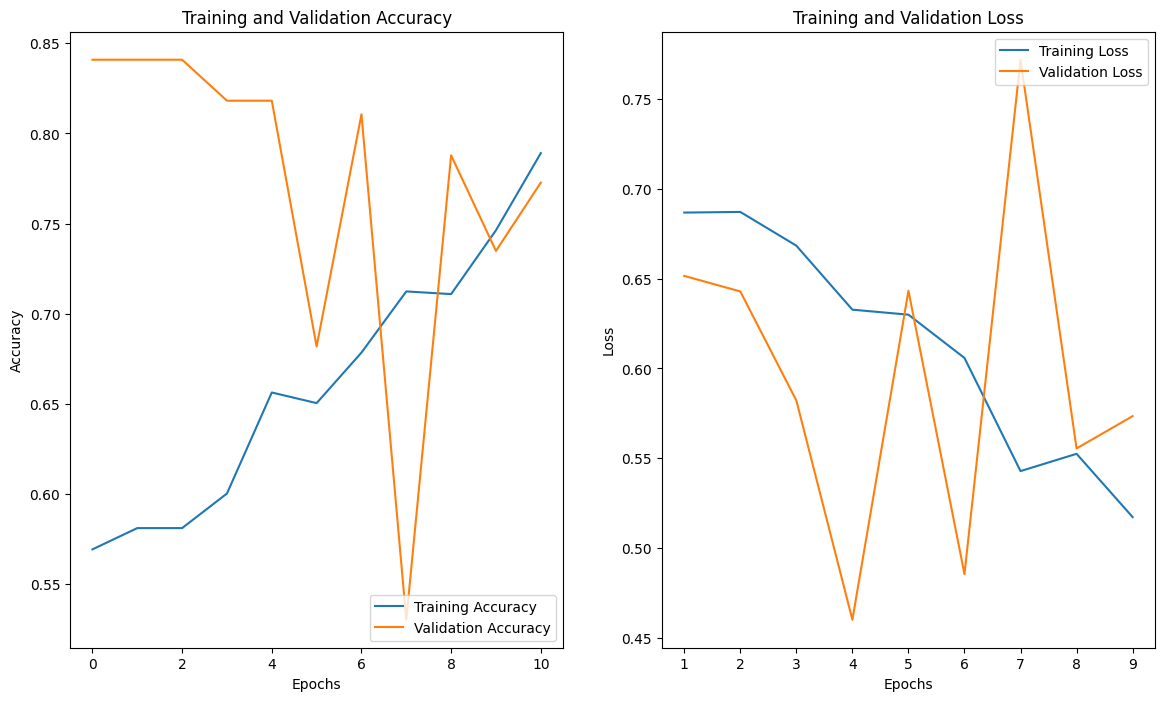

In [30]:
fg_size=(14,8)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epch)

plt.figure(figsize=fg_size)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  

plt.subplot(1, 2, 2)
plt.plot(epochs_range[1:-1], loss[1:-1], label='Training Loss')
plt.plot(epochs_range[1:-1], val_loss[1:-1], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.show()

In [31]:
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

5/5 - 2s - loss: 0.5126 - accuracy: 0.7727 - 2s/epoch - 476ms/step
Loss: 0.5126250386238098 Accuracy: 0.7727272510528564


### BEST EPOCH

In [32]:
model = load_model(checkpoint_path)
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)
print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

5/5 - 3s - loss: 0.4602 - accuracy: 0.8182 - 3s/epoch - 511ms/step
Loss: 0.46017587184906006 Accuracy: 0.8181818127632141


In [33]:
performance_d={'NAME':mdl,
               'ACCURACY':test_accuracy,
               'LOSS':test_loss,
               'HEIGHT':HEIGHT,
               'WIDTH':WIDTH}

performance_d

{'NAME': 'video_conv3D',
 'ACCURACY': 0.8181818127632141,
 'LOSS': 0.46017587184906006,
 'HEIGHT': 160,
 'WIDTH': 160}

# VALIDATION DATA

In [34]:
predictions = model.predict(X_eval)
print(predictions)



5/5 [==============================] - 3s 444ms/step
[[0.46900523]
 [0.46546218]
 [0.24929301]
 [0.23895453]
 [0.14078128]
 [0.29826102]
 [0.30790508]
 [0.2000723 ]
 [0.29785505]
 [0.18399827]
 [0.16564298]
 [0.3081056 ]
 [0.14552456]
 [0.2243264 ]
 [0.4777144 ]
 [0.43000787]
 [0.1932891 ]
 [0.29100886]
 [0.29288775]
 [0.2118852 ]
 [0.33430734]
 [0.2588712 ]
 [0.35074827]
 [0.20675305]
 [0.18812056]
 [0.22320363]
 [0.12866737]
 [0.43731225]
 [0.29425135]
 [0.20289128]
 [0.46065542]
 [0.18570198]
 [0.14120863]
 [0.3814131 ]
 [0.15334556]
 [0.36148906]
 [0.175895  ]
 [0.2664629 ]
 [0.34675676]
 [0.36419538]
 [0.21447271]
 [0.27262998]
 [0.2140556 ]
 [0.2698973 ]
 [0.47243413]
 [0.19815454]
 [0.23395695]
 [0.16182008]
 [0.1882551 ]
 [0.4233769 ]
 [0.23087567]
 [0.4208297 ]
 [0.29899278]
 [0.22342844]
 [0.22035418]
 [0.360191  ]
 [0.48419598]
 [0.23208867]
 [0.16652176]
 [0.22233157]
 [0.27741465]
 [0.1822263 ]
 [0.20724744]
 [0.35121506]
 [0.45945027]
 [0.28644088]
 [0.3602151 ]
 [0.19830

## ROC CURVE

In [35]:

fpr_val, tpr_val, thresholds_val = roc_curve(Y_eval, predictions)

roc_auc_false = auc(fpr_val, tpr_val)
roc_auc_thresholds = auc(thresholds_val, tpr_val)

c:\PROJECTS\emboendo\.venv\Lib\site-packages\numpy\lib\function_base.py:4978: RuntimeWarning: invalid value encountered in multiply
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)


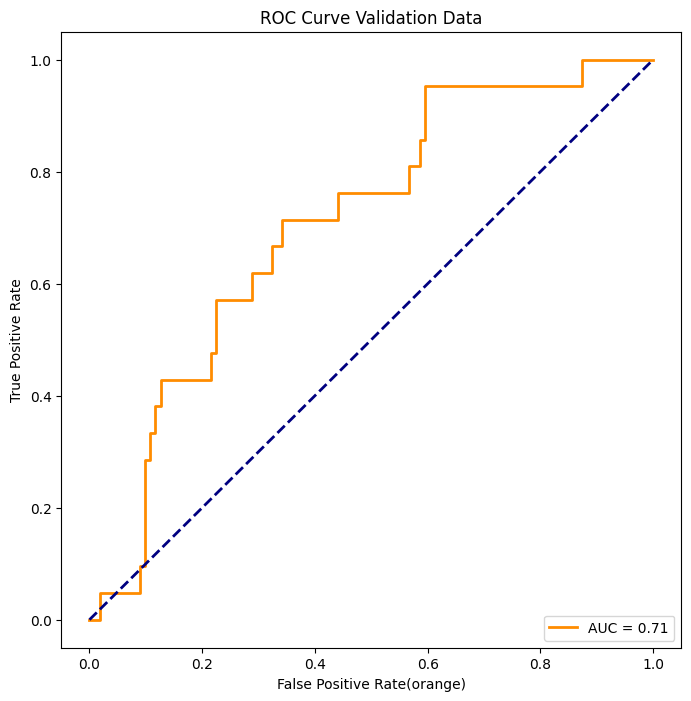

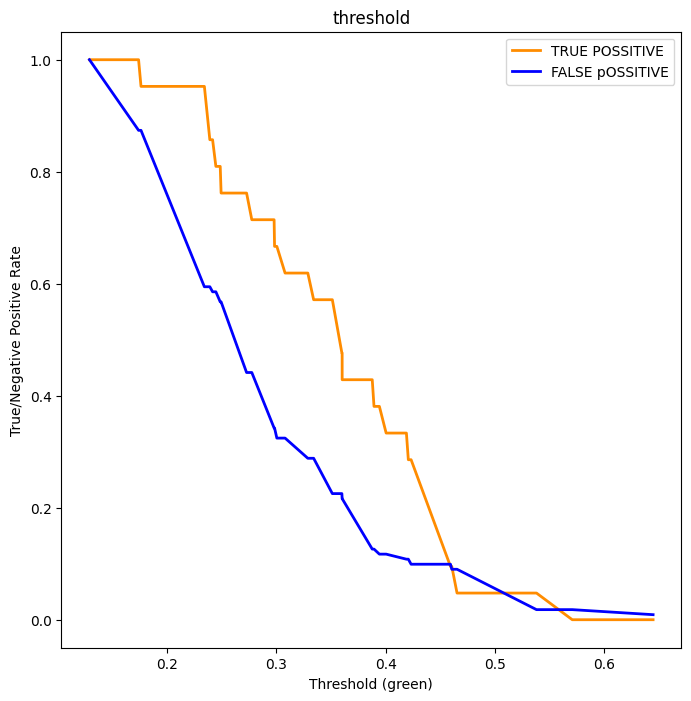

In [36]:
plt.figure(figsize=(8, 8))

plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'AUC = {roc_auc_false:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate(orange)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Validation Data')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 8))

plt.plot(thresholds_val,tpr_val, color='darkorange', lw=2, label='TRUE POSSITIVE')
plt.plot(thresholds_val,fpr_val, color='blue', lw=2, label=f'FALSE pOSSITIVE')
plt.xlabel('Threshold (green)')
plt.ylabel('True/Negative Positive Rate')
plt.title('threshold')
plt.legend()
plt.show()

#  FORECAST EVALUATION

In [37]:
predictions_raw=[]

trsh=0.35

for pred in predictions:

    if pred < trsh:predictions_raw.append(0)
    else:predictions_raw.append(1)

predictions_raw=np.array(predictions_raw)


In [38]:
conf_matrix = confusion_matrix(Y_eval, predictions_raw)

print("Matriz de Confusión:")
print(conf_matrix)

# Obtener el informe de clasificación
classification_report_str = classification_report(Y_eval, predictions_raw)
print("Informe de Clasificación:")
print(classification_report_str)



Matriz de Confusión:
[[85 26]
 [ 9 12]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       111
           1       0.32      0.57      0.41        21

    accuracy                           0.73       132
   macro avg       0.61      0.67      0.62       132
weighted avg       0.81      0.73      0.76       132



In [39]:
true_classes = Y_eval  

correctly_classified_indices = np.where(predictions_raw == true_classes)[0]
incorrectly_classified_indices = np.where(predictions_raw != true_classes)[0]

correctly_classified_video_ids = [video_id for video_id in correctly_classified_indices]
incorrectly_classified_video_ids = [video_id for video_id in incorrectly_classified_indices]

num_zeros = np.count_nonzero(Y_eval == 0)
num_ones = np.count_nonzero(Y_eval == 1)


In [40]:
correct_labels_val = [Y_eval[i] for i in correctly_classified_indices]

print(correct_labels_val)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [41]:

print(f"OK, {len(correctly_classified_video_ids)}")
print(f"BAD, {len(incorrectly_classified_video_ids)}")
print(f'Ratio forecast: {len(correctly_classified_video_ids)/len(incorrectly_classified_video_ids)}')
print(f'Ratio labeling: {max([num_ones,num_zeros])/min([num_ones,num_zeros])}')


OK, 97
BAD, 35
Ratio forecast: 2.7714285714285714
Ratio labeling: 5.285714285714286


## SINGLE FORECAST

In [42]:

print(recs_eval)


['415001_3', '646778_27', '6272_7', '646778_21', 'I286', 'I469', '385597_11', '178572_3', '651399_9', '272340_7', 'I157', '178572_7', '385597_3', 'I556', '385597_17', '669183_3', 'I1069', '109897_5', '109897_3', 'I791', 'I481', '380772_9', 'I872', '380772_6', 'I946', '663849_5', 'I354', 'I918', 'I312', 'I782', '669183_5', 'I263', 'I699', '224436_3', '646778_7', '6272_1', 'I1228', 'I628', '224436_8', 'I1055', '178572_11', 'I1258', 'I159', '6272_2', '6272_12', 'I389', 'I102', 'I1192', 'I729', 'I923', 'I981', '512291_3', 'I803', 'I911', '224436_10', 'I1244', 'I28', 'I471', 'I785', '646778_20', '673676_23', '663849_8', 'I1209', '670615_15', 'I879', 'I252', 'I168', 'I66', 'I473', '670615_13', 'I897', 'I1119', 'I832', 'I947', 'I820', 'I395', 'I664', '385597_1', 'I484', 'I201', '109897_2', '178572_9', '670615_7', 'I968', 'I822', 'I131', 'I89', '224436_14', '178572_15', 'I203', 'I259', '670615_3', 'I825', 'I960', '660022_5', 'I939', 'I418', 'I56', 'I812', '224436_17', '380772_8', 'I801', 'I675

In [43]:

rec_elm='I765'
idx=recs_eval.index(rec_elm)


print(f' Record: {rec_elm} , index: {idx}, real label: {Y_eval_spl[idx]}')

ValueError: 'I765' is not in list

In [ ]:
if checking_on:fig_lib.vid_show(X_eval[idx],t_btw_frm=t_btw_frm)

In [ ]:
nuevo_video = np.expand_dims(X_eval[idx], axis=0)

# Realizar la predicción
prediccion = model.predict(nuevo_video)
prediccion